### Problem Statement

To reduce customer churn, the telecom companie needs to predict which customers are at high risk of churn. churn prediction is usually more critical (and non-trivial) for prepaid customers. In this project, you will use the usage-based definition to define churn. 

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.



#### Loading Packages

In [158]:
# Loading Data Analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)


# Loading Scikit-Learn packages for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score


import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [159]:
# Reading data set
churn = pd.read_csv("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [160]:
# General Information
print(churn.dtypes)

print(churn.info())

print(churn.shape)

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [161]:
# Dropping phone number column as we dont need for the analysis or modeling
# churn.drop("mobile_number", axis = 1, inplace = True)
churn.set_index("mobile_number", inplace= True)

In [162]:
churn.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.

Dropping all the columns as these columns have only one value present in all the rows and will not be useful for the analysis.

In [163]:
# Dropiing all these columns as these are not useful for the analysis.
churn.drop(['circle_id'], axis = 1, inplace = True)

# 1. Missing value treatment

In [164]:
# Checking for missing values
print(round(100 * (churn.isnull().sum() / len(churn)), 2))

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou

In [165]:
# Checking for the columns where missing value is more than 70%
high_missing_cols = churn.columns[(churn.isnull().sum()/len(churn)) > 0.7]
high_missing_cols

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [166]:
churn.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 
            'date_of_last_rech_data_9'], axis = 1, inplace = True)

In [167]:
churn.shape

(99999, 220)

***Working on the Date columns and removing all the date columns as we do not need this for the analysis.***

In [168]:
date_cols = [col for col in churn.columns if "date" in col]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

Dropping the `date_of_last_rech_data_6`, `date_of_last_rech_data_7`,`date_of_last_rech_data_8`, `date_of_last_rech_data_9` columns as these columns will be not mych usefull for the modelling as these columns have more than 70% data missing.

In [169]:
churn.drop(date_cols, axis = 1, inplace = True)

In [170]:
# Information about the data recharge columns
data_rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                  'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                  'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                   'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

churn[data_rech_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


**Looking for the pattern in trems of  data recharge in 4 months for missing value treatment**


In [171]:
churn[data_rech_cols].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
mobile_number,,,,,,,,,,,,,,,,,,,,
7000842753,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
7001865778,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
7001625959,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
7001204172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7000142493,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


All these missing values can be replaced with 0 based on the assumption that number of 0 recharge or 0mb or data recharge with 0 rupee is not going to make the data set bias.

In [172]:
# Imputing missing values with 0
churn[data_rech_cols] = churn[data_rech_cols].fillna(0)

In [173]:
# Checking the imputation is correct or not
churn[data_rech_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

**Looking for the pattern in Average Rating/User (arpu) 2g and 3g data for missing value treatment**

In [174]:
arpu_cols = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']
churn[arpu_cols].describe()

,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026
std,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224
min,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000
75%,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000
max,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


These are also highly skewed columns and we have other column to get arpu total. And imputing the missing vaues with 0 assuming that those customer did `not do data rechange` at all. So they do not have any rating.

In [175]:
# Imputing missing values with 0
churn[arpu_cols] = churn[arpu_cols].fillna(0)

**Looking for the pattern in night pack user data and fb user data for missing value treatment**

In [176]:
cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
        'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

for col in cols:
    print(f"{col} --> {churn[col].unique()}")

night_pck_user_6 --> [ 0. nan  1.]
night_pck_user_7 --> [ 0. nan  1.]
night_pck_user_8 --> [ 0. nan  1.]
night_pck_user_9 --> [nan  0.  1.]
fb_user_6 --> [ 1. nan  0.]
fb_user_7 --> [ 1. nan  0.]
fb_user_8 --> [ 1. nan  0.]
fb_user_9 --> [nan  1.  0.]


In [177]:
# checking skewness of these columns
churn[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


These columns have around 75% missing values and imputing all the missing values assuming non user with 0 will create high data imbalance. So we are dropping thise columns.

In [178]:
# Dropping all the night pack and fb user columns
churn.drop(cols, axis =1, inplace = True)

As we can check if the person is actually using the service or not by checking the count of recharge columns and usage, we have decided to drop these date columns as these are not usefull for teh analysis.

**Imputing all the outgoing columns**

In [179]:
# Imputing all the local outgoing columns missing value with 0
local_og = [col for col in churn.columns if "loc_og" in col]
churn[local_og] = churn[local_og].fillna(0)

In [180]:
# Imputing all the local outgoing columns missing value with 0
std_og = [col for col in churn.columns if "std_og" in col]
churn[std_og] = churn[std_og].fillna(0)

In [181]:
# Imputing all the local outgoing columns missing value with 0
isd_og = [col for col in churn.columns if "isd_og" in col]
churn[isd_og] = churn[isd_og].fillna(0)

In [182]:
# Imputing all the local outgoing columns missing value with 0
spl_og = [col for col in churn.columns if "spl_og" in col]
churn[spl_og] = churn[spl_og].fillna(0)

In [183]:
# Imputing all the local outgoing columns missing value with 0
og_others = [col for col in churn.columns if "og_others" in col]
churn[og_others] = churn[og_others].fillna(0)

**Imputing all the incoming columns**

In [184]:
# Imputing all the local outgoing columns missing value with 0
loc_ic = [col for col in churn.columns if "loc_ic" in col]
churn[loc_ic] = churn[loc_ic].fillna(0)

In [185]:
# Imputing all the local outgoing columns missing value with 0
std_ic = [col for col in churn.columns if "std_ic" in col]
churn[std_ic] = churn[std_ic].fillna(0)

In [186]:
# Imputing all the local outgoing columns missing value with 0
isd_ic = [col for col in churn.columns if "isd_ic" in col]
churn[isd_ic] = churn[isd_ic].fillna(0)

In [187]:
# Imputing all the local outgoing columns missing value with 0
spl_ic = [col for col in churn.columns if "spl_ic" in col]
churn[spl_ic] = churn[spl_ic].fillna(0)

In [188]:
# Imputing all the local outgoing columns missing value with 0
ic_others = [col for col in churn.columns if "ic_others" in col]
churn[ic_others] = churn[ic_others].fillna(0)

**Filtering rest of the missing value columns for analysis and imputation**

In [189]:
rest_missing_cols = churn.columns[churn.isnull().sum() > 0]
rest_missing_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9'],
      dtype='object')

In [190]:
for col in rest_missing_cols:
    churn.loc[np.isnan(churn[col]), [col]] = churn[col].median()

In [191]:
print(round(100*churn.isnull().sum()/len(churn) , 2))

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

## Tagging High Value Customer

**Creating Total Recharge Amount derived for the month 6,7 and 8 to identify the high value customer**

In [192]:
churn['total_rech_amt_data_6'] = churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
churn['total_rech_amt_data_7'] = churn['av_rech_amt_data_7'] * churn['total_rech_data_7']
churn['total_rech_amt_data_8'] = churn['av_rech_amt_data_8'] * churn['total_rech_data_8']

As we have derived new column, we are dropping average data recharge columns as these are redundant.

In [193]:
# Dropping all the average data recharge amount columns
churn.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis = 1, inplace = True)

Creating total_amt column by adding up `total_rech_amt_data` + `total_rech_amt`

In [194]:
churn['total_amt_6'] = churn['total_rech_amt_6'] + churn['total_rech_amt_data_6']
churn['total_amt_7'] = churn['total_rech_amt_7'] + churn['total_rech_amt_data_7']

As we have to build the model on the high valued customer, we are creating a label = 1 for high value customer.
For that we need to take the average of the month 6 and 7 total amount. and then 70 percentile will be the cut off to decide if a customer is `good customer` or not.

In [195]:
churn['avg_of_6_7'] = ((churn['total_amt_6'] + churn['total_amt_7'])/2).round(2)
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_amt_6,total_amt_7,avg_of_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0

In [196]:
churn.shape

(99999, 207)

In [197]:
# Cutoff of 70% to decide the good customer based on avegare recharge of the month 6 and 7
cutoff = churn['avg_of_6_7'].quantile(0.7)
cutoff

478.0

Filtering high value customer data frame.

In [198]:
# Filtering based on the cutoff value
hvc = churn.loc[churn['avg_of_6_7'] >= cutoff]
hvc

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_amt_6,total_amt_7,avg_of_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0

**So we have around 30001 high value curtomer in the data**

Dropping `avg_of_6_7`,`total_amt_6`,`total_amt_7` derived columns

In [199]:
# Dropping these colums as these are redundant and we dont need for the analysis
hvc.drop(['avg_of_6_7','total_amt_6','total_amt_7'], axis = 1, inplace = True)

### Deriving churn column based on
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [200]:
hvc[["total_ic_mou_9", "total_og_mou_9" ,"vol_2g_mb_9", "vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
mobile_number,,,,
7000842753,0.00,0.00,0.00,0.00
7000701601,0.00,0.00,0.00,0.00
7001524846,34.91,142.18,0.00,0.00
7002124215,252.61,1031.53,0.00,0.00
7000887461,127.48,127.63,13.93,314.74


In [201]:
# Creating the total usage column for the month 9
hvc["total_usage_9"] = hvc["total_ic_mou_9"]+hvc["total_og_mou_9"]+hvc["vol_2g_mb_9"] + hvc["vol_3g_mb_9"]

In [202]:
hvc["total_usage_9"].head()

mobile_number
7000842753       0.00
7000701601       0.00
7001524846     177.09
7002124215    1284.14
7000887461     583.78
Name: total_usage_9, dtype: float64

In [203]:
# Creating churn column
def is_churn(x):
    if x == 0:
        return 1
    else:
        return 0

hvc["churn"] = hvc["total_usage_9"].apply(is_churn)

#### Dropping all the churn phase related columns

In [204]:
# dropping all the columns which are related to the churn phase "9" as we have already derived churn column
nine_cols = [col for col in hvc.columns if "9" in col]
hvc.drop(nine_cols, axis = 1, inplace=True)

In [205]:
hvc.shape

(30001, 156)

In [206]:
hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1
70

In [207]:
# checking data imbalance in target column
100*hvc["churn"].value_counts()/len(hvc)

0    91.863605
1     8.136395
Name: churn, dtype: float64

Only 8% of the high value customer are churn in 9th month

# 2. Data Preperation

In [208]:
# Copying the dataframe into df for further analysis
df = hvc.copy()

In [209]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1
70

In [210]:
# Checking for the unique values in data frame
for col in df.columns:
    print(f"{col} --> {df[col].unique()}")
    print(f"count: {len(df[col].unique())}")
    print("------------------")

loc_og_t2o_mou --> [0.]
count: 1
------------------
std_og_t2o_mou --> [0.]
count: 1
------------------
loc_ic_t2o_mou --> [0.]
count: 1
------------------
arpu_6 --> [ 197.385 1069.18   378.721 ...  644.973  312.558  322.991]
count: 29072
------------------
arpu_7 --> [ 214.816 1349.85   492.223 ...  455.228  512.932  303.386]
count: 29084
------------------
arpu_8 --> [ 213.803 3171.48   137.362 ...  564.334  402.08   606.817]
count: 28073
------------------
onnet_mou_6 --> [ 34.31  57.84 413.69 ... 196.99 423.99 806.73]
count: 16890
------------------
onnet_mou_7 --> [ 32.33  54.68 351.03 ...  29.04 549.36 174.46]
count: 16987
------------------
onnet_mou_8 --> [  0.    52.29  35.08 ... 251.91  63.91 775.41]
count: 15872
------------------
offnet_mou_6 --> [ 96.31 453.43  94.66 ...  56.13  39.51 784.76]
count: 21220
------------------
offnet_mou_7 --> [  91.735  567.16    80.63  ... 1123.56   617.13   277.01 ]
count: 21264
------------------
offnet_mou_8 --> [   0.    325.91  136.48

count: 841
------------------
og_others_7 --> [0.0000e+00 5.5000e-01 5.6300e+00 1.6000e-01 7.8000e-01 7.5000e-01
 2.7900e+00 3.4100e+00 1.9100e+00 1.1500e+00 7.1000e-01 7.6800e+00
 1.0300e+00 6.2500e+00 2.0000e-01 2.3560e+01 8.1000e-01 3.7300e+00
 3.5000e-01 3.0000e-02 1.2300e+00 1.0600e+00 2.7300e+00 1.3300e+01
 3.1000e-01 3.8000e-01 1.4150e+01 2.5000e+00 2.5000e-01 1.4100e+00
 4.8000e-01 4.2930e+01 1.3780e+01 7.6400e+00 1.1100e+00 9.5000e-01
 6.0900e+00 5.1100e+00 1.8000e-01 3.6500e+00 2.1100e+00 2.1800e+00
 6.0000e-02 2.4330e+01 8.6900e+00 1.3600e+00 4.5000e-01 1.9000e+00
 1.6800e+00 1.3000e-01 1.3228e+02 1.6100e+00 6.5600e+00 8.0000e-02
 5.0000e-02 1.7100e+00 3.6000e-01 1.0000e+00 8.4300e+00 2.6000e-01
 7.0000e-01 2.3300e+00 5.3000e-01 8.8000e-01 6.6560e+01 1.3000e+00
 6.0000e-01 8.5000e-01 1.1630e+01 4.0000e-01 4.6600e+00 2.3600e+00
 2.8800e+00 5.6000e-01 3.4400e+00 3.3000e-01 1.4560e+01 1.1000e-01
 1.0500e+00 5.8000e-01 9.6000e-01 6.8300e+00 2.0300e+00 7.6000e+00
 5.1000e-01 1.33

 14. 23. 17. 21. 19. 20. 18. 26. 27. 30. 25. 28. 31. 32. 48. 43. 35. 24.]
count: 36
------------------
count_rech_2g_8 --> [ 0.  3.  1. 16.  7.  2.  4.  5. 13. 15. 24. 12.  9.  6. 10. 14.  8. 27.
 11. 18. 22. 17. 19. 26. 25. 21. 29. 33. 34. 20. 44. 32. 31. 23.]
count: 34
------------------
count_rech_3g_6 --> [ 1.  0.  5.  3.  2.  8.  4.  6. 10. 22.  7. 13. 11. 29. 16. 18. 12. 19.
  9. 23. 14. 17. 15. 21. 28.]
count: 25
------------------
count_rech_3g_7 --> [ 1.  0.  2.  8.  4.  3.  5. 20. 15.  6.  7. 10. 12. 17. 23. 22. 11.  9.
 13. 19. 14. 21. 24. 18. 35. 34. 16. 31.]
count: 28
------------------
count_rech_3g_8 --> [ 1.  0.  2.  3.  5.  7.  4. 23. 30. 13.  6.  8. 10. 24. 12. 25. 15. 16.
  9. 45. 19. 21. 18. 11. 17. 20. 14. 29. 42.]
count: 29
------------------
vol_2g_mb_6 --> [  30.13    0.     87.05 ... 2198.07 1248.5    34.28]
count: 11311
------------------
vol_2g_mb_7 --> [  1.32   0.   356.   ... 725.05  16.41 241.77]
count: 11228
------------------
vol_2g_mb_8 --> [5.7500e+00

In [211]:
df.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

We can see that the data is highly skewed. So dropping the columns which has 0 value till 75 percentile.

In [212]:
cols_to_drop = ["loc_og_t2o_mou", "std_og_t2o_mou","loc_ic_t2o_mou","roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8",
"roam_og_mou_6","roam_og_mou_7","roam_og_mou_8","std_og_t2f_mou_6","std_og_t2f_mou_7","std_og_t2f_mou_8","std_og_t2c_mou_6",
"std_og_t2c_mou_7","std_og_t2c_mou_8","isd_og_mou_6","isd_og_mou_7","isd_og_mou_8","og_others_6","og_others_7",
"og_others_8","std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8","spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8",
"isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8","ic_others_6","ic_others_7","ic_others_8","count_rech_2g_6","count_rech_2g_7",
"count_rech_2g_8","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","monthly_2g_6","monthly_2g_7",
"monthly_2g_8","sachet_2g_6","sachet_2g_7","sachet_2g_8","monthly_3g_6","monthly_3g_7","monthly_3g_8","sachet_3g_6",
"sachet_3g_7","sachet_3g_8"]

df.drop(cols_to_drop, axis = 1, inplace = True)

In [213]:
df.shape

(30001, 105)

# 3. EDA

In [214]:
# Creating non churn subset of the data frame
churn_0 = df.loc[df['churn'] == 0]
# Creating churn subset of the data frame
churn_1 = df.loc[df['churn'] == 1]

### Univariate analysis

**Max Recharge Amount**

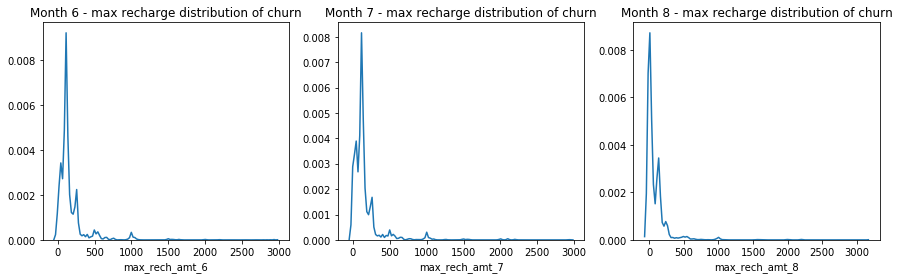

In [215]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(churn_1["max_rech_amt_6"], hist=False)
plt.title("Month 6 - max recharge distribution of churn")
plt.subplot(1,3,2)
sns.distplot(churn_1["max_rech_amt_7"], hist=False)
plt.title("Month 7 - max recharge distribution of churn")
plt.subplot(1,3,3)
sns.distplot(churn_1["max_rech_amt_8"], hist=False)
plt.title("Month 8 - max recharge distribution of churn")
plt.show()

Most of the churners recharged with less amount.

**Max data recharge**

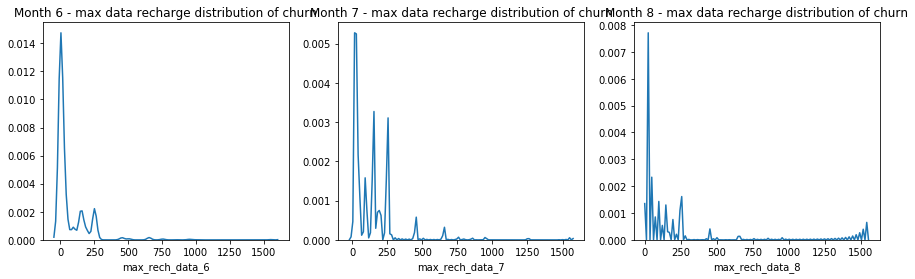

In [216]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(churn_1["max_rech_data_6"], hist=False)
plt.title("Month 6 - max data recharge distribution of churn")
plt.subplot(1,3,2)
sns.distplot(churn_1["max_rech_data_7"], hist=False)
plt.title("Month 7 - max data recharge distribution of churn")
plt.subplot(1,3,3)
sns.distplot(churn_1["max_rech_data_8"], hist=False)
plt.title("Month 8 - max data recharge distribution of churn")
plt.show()

Most of the churners recharged with less number of data recharge.

**ARPU**

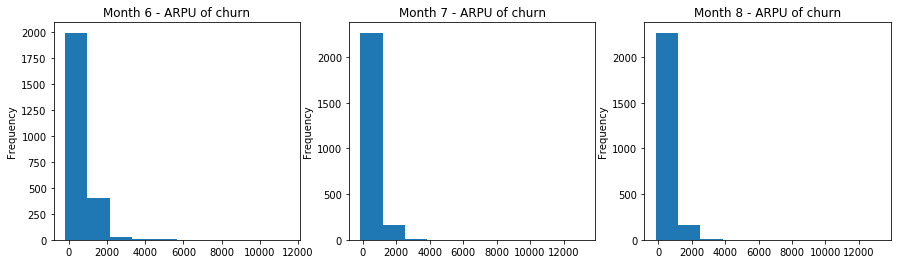

In [217]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
churn_1["arpu_6"].plot.hist()
plt.title("Month 6 - ARPU of churn")
plt.subplot(1,3,2)
churn_1["arpu_7"].plot.hist()
plt.title("Month 7 - ARPU of churn")
plt.subplot(1,3,3)
churn_1["arpu_7"].plot.hist()
plt.title("Month 8 - ARPU of churn")
plt.show()

The distribution is hghly skewed and not preperly distributed at all. Churners are distributed in the lower side of the arpu distribution.

### Bivariate analysis

**Total Recharge Numbers**

In [218]:
# Creating list of columns
total_rech_num = [col for col in df.columns if "total_rech_num" in col]
total_rech_num

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']

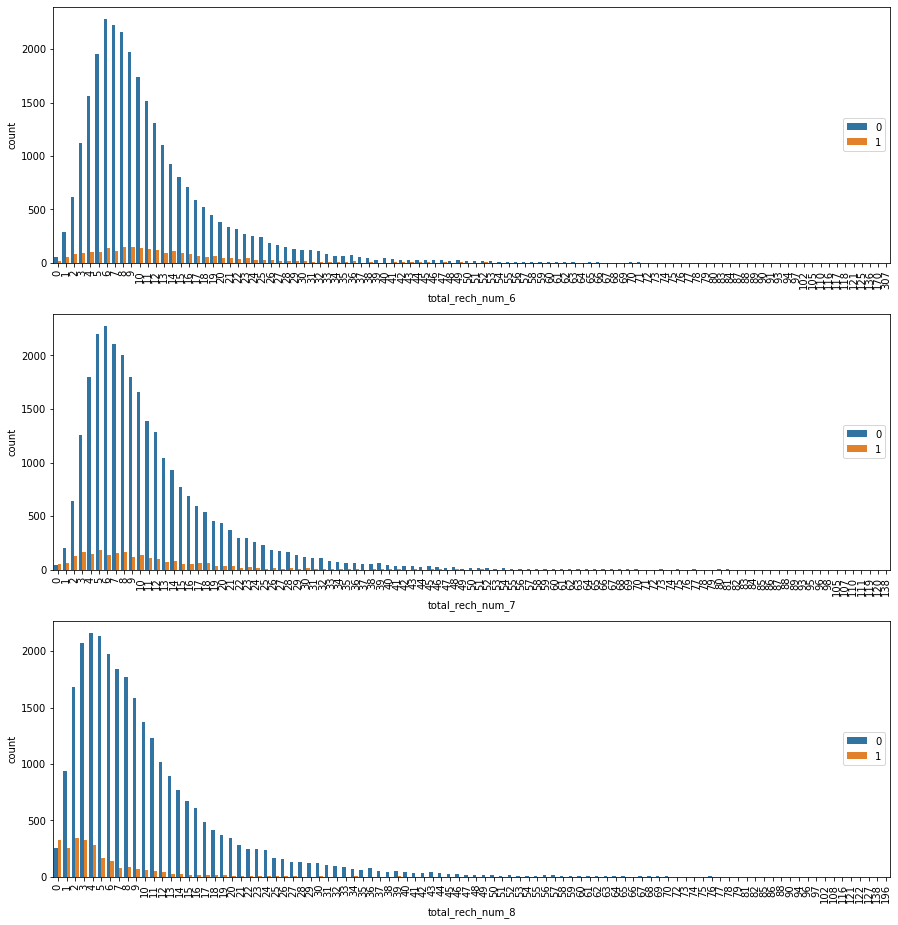

In [219]:
# Plotting the total recharge number during these 3 months
plt.figure(figsize=(15,16))
for i,col in enumerate(total_rech_num):
    plt.subplot(3,1,i+1)
    sns.countplot(df[col], hue=df["churn"])
    plt.xticks(rotation=90)
    plt.legend(loc="right")

- Those who recharged less number of times in month 6, are the highest churners.
- Those who recharged 14 times or below in month 7, are the highest churners.
- Those who recharged less than 4 times in month 8, are the highest churners.

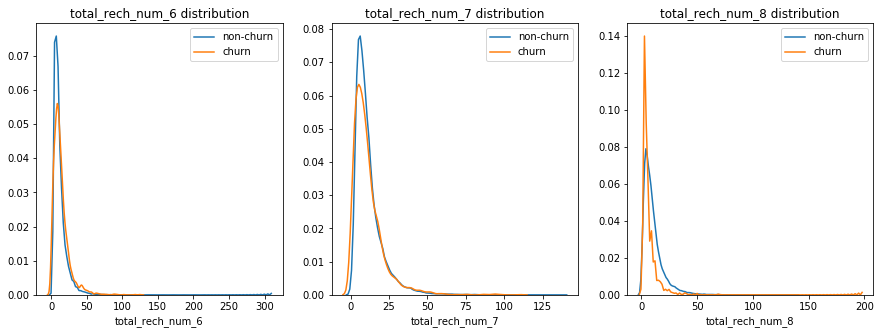

In [220]:
# Plotting the number of recharges distribution
plt.figure(figsize=(15,5))
for i,col in enumerate(total_rech_num):
    plt.subplot(1,3,i+1)
    sns.distplot(churn_0[col], hist=False, rug=False, label="non-churn")
    sns.distplot(churn_1[col], hist=False, rug=False, label="churn")
    plt.title(f"{col} distribution")
    plt.legend(loc="best")

We can see form the distribution that
- Crearly those who recharged less number of times in month 8 got churned in month 9.
- This is good indicator that if a person is recharging less number of time in month 8, has high chances to be churned.

**Total number of data recharge**

In [221]:
# Creating list of columns
total_rech_data = [col for col in df.columns if "total_rech_data" in col]
total_rech_data

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']

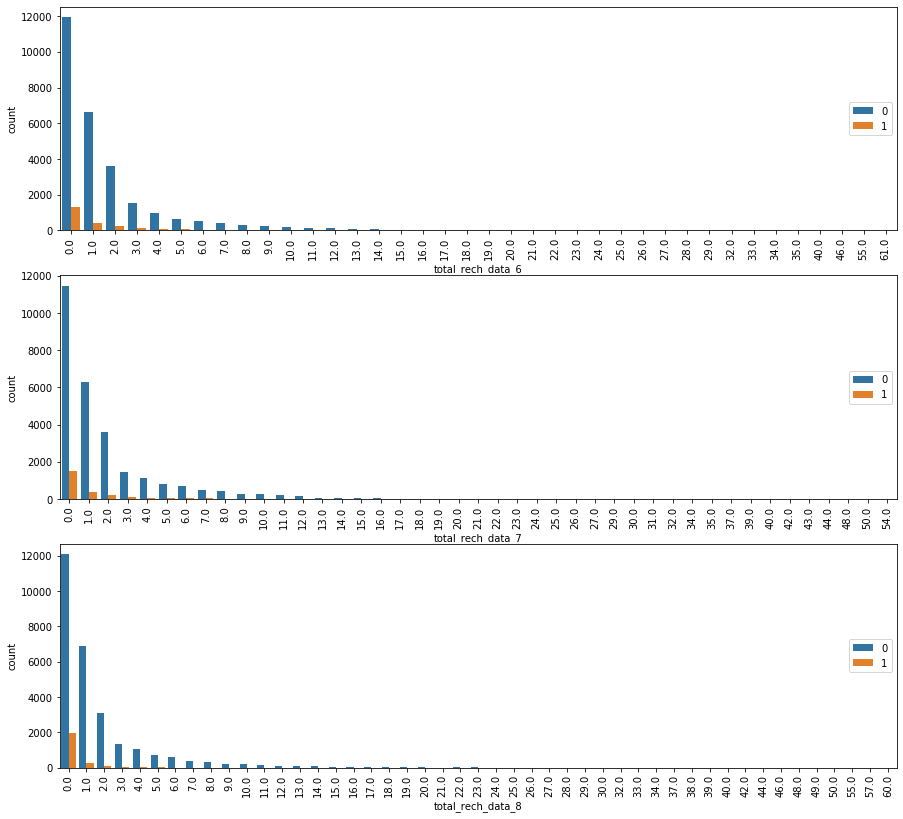

In [222]:
# Plotting the Total data recharge number during these 3 months
plt.figure(figsize=(15,14))
for i,col in enumerate(total_rech_data):
    plt.subplot(3,1,i+1)
    sns.countplot(df[col], hue=df["churn"])
    plt.xticks(rotation=90)
    plt.legend(loc="right")

- Less number of data recharge has high number of churn count.

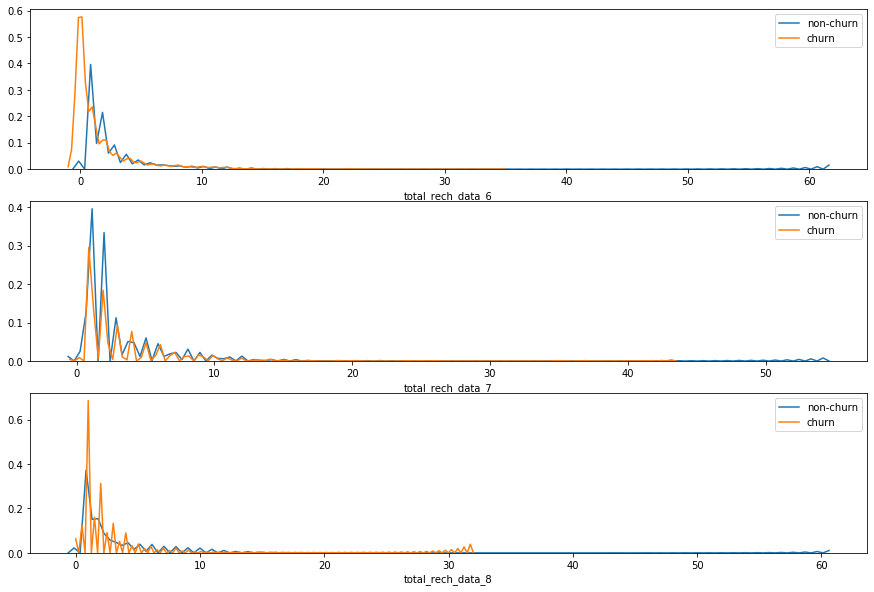

In [223]:
# Plotting the number of data recharges distribution
plt.figure(figsize=(15,10))
for i,col in enumerate(total_rech_data):
    plt.subplot(3,1,i+1)
    sns.distplot(churn_0[col], hist=False, rug=False, label="non-churn")
    sns.distplot(churn_1[col], hist=False, rug=False, label="churn")
    plt.legend(loc="best")

- The customer who did less number of data rechange in month 6 has high change to be churned.
- Customer who did not recharge in month 7, were the most churners. 

**Age on network - number of days the customer is using the operator T network (aon)**

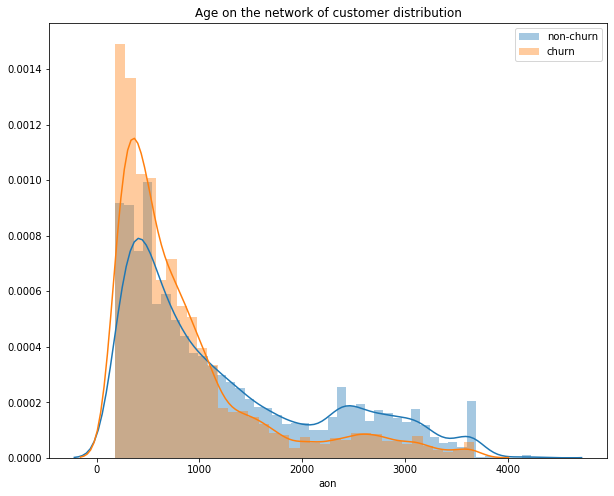

In [224]:
# Plotting distribution of aon
plt.figure(figsize=(10,8))
sns.distplot(churn_0["aon"], hist=True, rug=False, label="non-churn")
sns.distplot(churn_1["aon"], hist=True, rug=False, label="churn")
plt.title("Age on the network of customer distribution")
plt.legend(loc="best");

- We can see that around 300-500 days age bucket are most likely to be churned.

**Analysing all the data volumns usage columns with respect to total recharge of data amount**

In [225]:
vol_data = [col for col in df.columns if "vol" in col]
vol_data

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

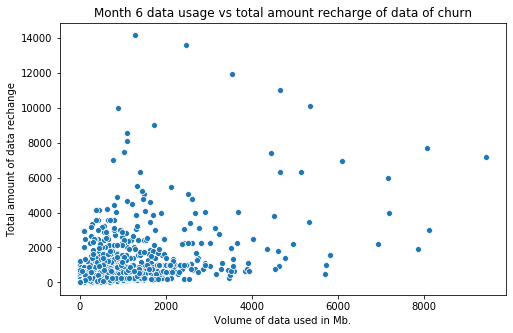

In [226]:
# Plotting month 6  data usage vs amount recharge
plt.figure(figsize=(8, 5))
sns.scatterplot(churn_1["vol_2g_mb_6"]+churn_1["vol_3g_mb_6"], churn_1["total_rech_amt_data_6"])
plt.title("Month 6 data usage vs total amount recharge of data of churn")
plt.xlabel("Volume of data used in Mb.")
plt.ylabel("Total amount of data rechange")
plt.show()

- We can see most of the churners used below around 1500mb of data.
- Customers who recharged with less than 1000rs are likely to be churn.
- We can assume that beyond 1500mb data user and recharged with more than 1000rs in month 6, are not going to churn.

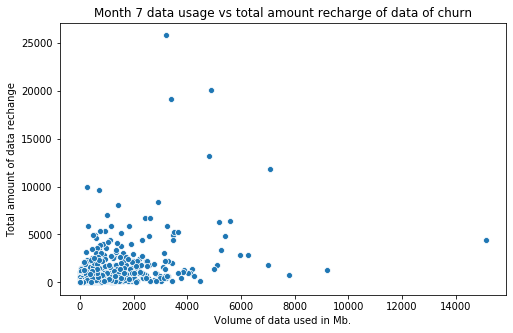

In [227]:
# Plotting month 7  data usage vs amount recharge
plt.figure(figsize=(8, 5))
sns.scatterplot(churn_1["vol_2g_mb_7"]+churn_1["vol_3g_mb_7"], churn_1["total_rech_amt_data_7"])
plt.title("Month 7 data usage vs total amount recharge of data of churn")
plt.xlabel("Volume of data used in Mb.")
plt.ylabel("Total amount of data rechange")
plt.show()

- Total amount of data recharge has positive correlation with volume of data used.
- We can see most of the churners used below 1000mb of data.
- Customers who recharged with less than 1000rs are likely to be churn.
- We can assume that beyond 1000mb data user and recharged with more than 1000rs in month 7, has very less chance to be churned.

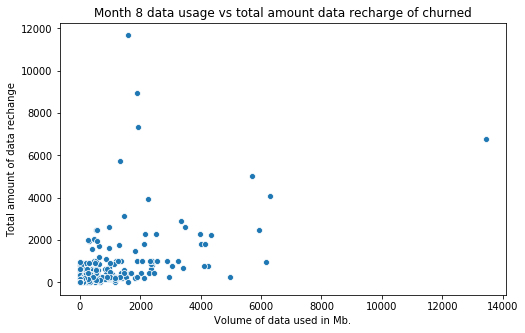

In [228]:
# Plotting month 8 data usage vs amount recharge
plt.figure(figsize=(8, 5))
sns.scatterplot(churn_1["vol_2g_mb_8"]+churn_1["vol_3g_mb_8"], churn_1["total_rech_amt_data_8"])
plt.title("Month 8 data usage vs total amount data recharge of churned")
plt.xlabel("Volume of data used in Mb.")
plt.ylabel("Total amount of data rechange")
plt.show()

- We can see that most of the churners used below 1200 mb of data in month 8.
- Also most of the churners recharged with less than 400rs in month 8.

**ARPU**

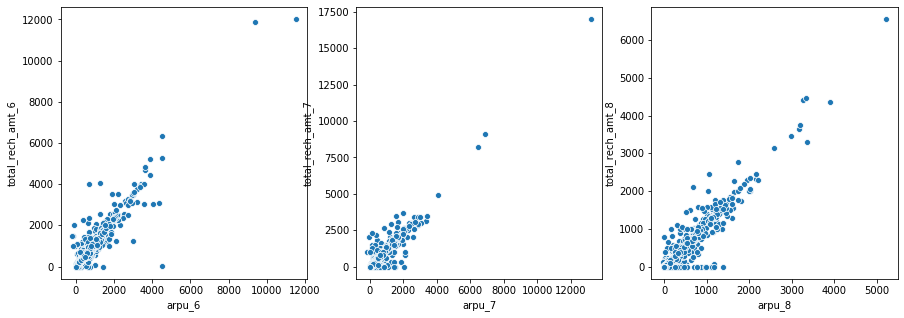

In [229]:
# Plotting 3 months arpu against total recharge of individual month
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.scatterplot(churn_1["arpu_6"], churn_1["total_rech_amt_6"])
plt.subplot(1,3,2)
sns.scatterplot(churn_1["arpu_7"], churn_1["total_rech_amt_7"])
plt.subplot(1,3,3)
sns.scatterplot(churn_1["arpu_8"], churn_1["total_rech_amt_8"])
plt.show()

- Average rating is highly correlated with total recharge amount and this is obvious.
- arpu below 2000 are more likely to be churners.

**Onnet usage vs Offnet usage**

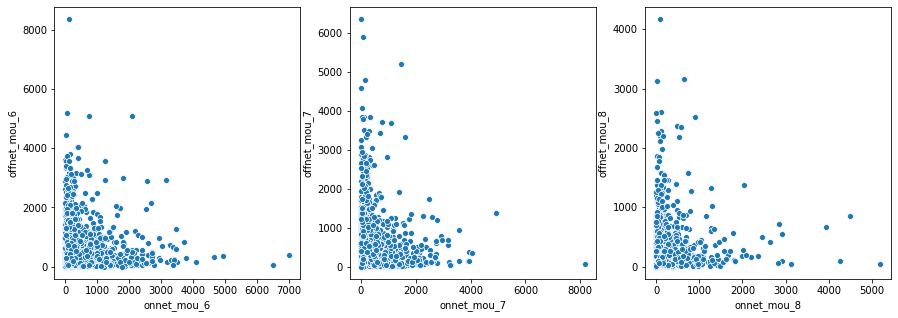

In [230]:
# Plotting 3 months arpu against total recharge of individual month
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.scatterplot(churn_1["onnet_mou_6"], churn_1["offnet_mou_6"])
plt.subplot(1,3,2)
sns.scatterplot(churn_1["onnet_mou_7"], churn_1["offnet_mou_7"])
plt.subplot(1,3,3)
sns.scatterplot(churn_1["onnet_mou_8"], churn_1["offnet_mou_8"])
plt.show()

- Here the churn data is allover the place and upto 2000min offnet got churned.
- On month 7 below 1500min offnet users got churned.
- We can see more concentration near the less onnet/offnet.

In [231]:
cols = [col for col in df.columns if "onnet" in col or "offnet" in col]
cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8']

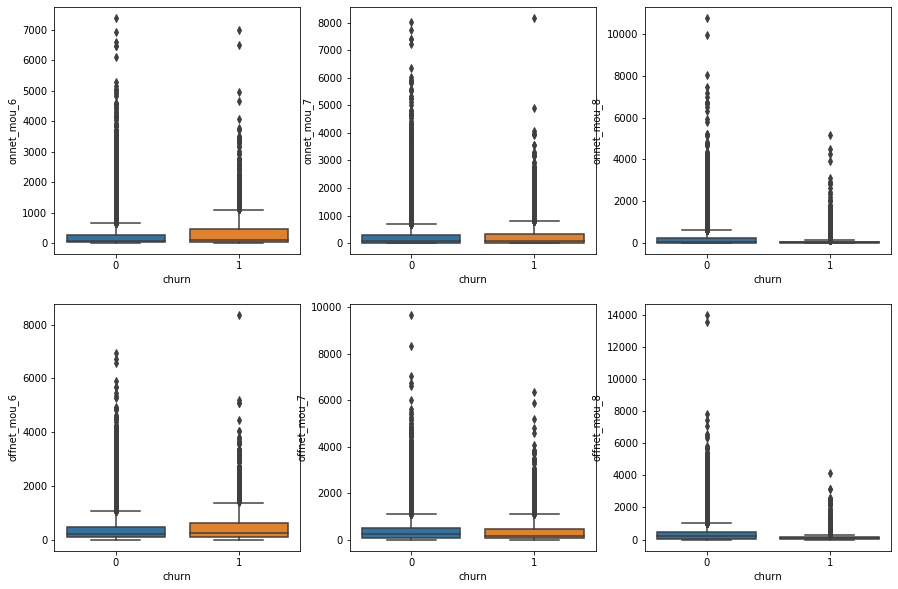

In [232]:
plt.figure(figsize=(15,10))
for i,col in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(x="churn", y=col, data=df)

- Most of the churned user had onnet usage around 200 mins. But the spread is as hish as 1000 mins and usage is more than non-churn user.
- Most of the churned user had offnet usage around 200 mins but the spread is as hish as 1200 mins and highest usage is more than non-churn user.

**BIvariate analysis on all the Total columns**

In [233]:
total = [col for col in df.columns if "total" in col]
total

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

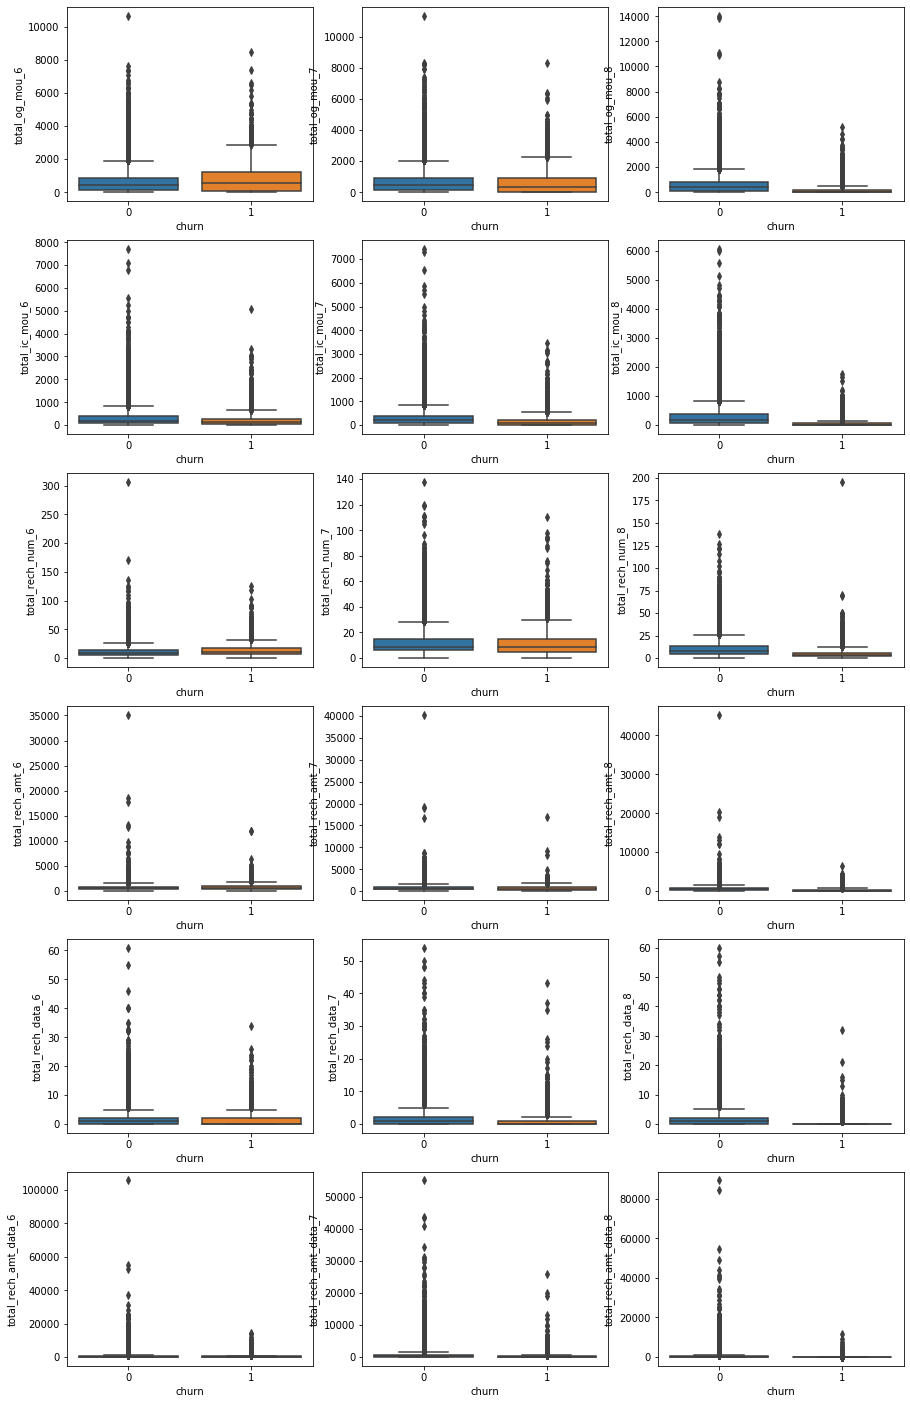

In [234]:
plt.figure(figsize=(15,25))
for i,col in enumerate(total):
    plt.subplot(6,3,i+1)
    sns.boxplot(x="churn", y=col, data=df)

- In month6, churned people used more outgoing than incoming.
- In monnth 6, churned people rechanrged more number of times and spend more amount than non-churn.
- Churned people used less data.

### Outliers Treatment

In [235]:
X = df.drop("churn", axis = 1)
y = df["churn"]

In [236]:
num_cols = X.columns
num_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'loc_og_t2t_mou_6',
       ...
       'arpu_2g_7', 'arpu_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'sep_vbc_3g', 'total_rech_amt_data_6',
       'total_rech_amt_data_7', 'total_rech_amt_data_8'],
      dtype='object', length=104)

In [238]:
X.dtypes

arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou_6             float64
loc_og_mou_7             float64
loc_og_mou_8             float64
std_og_t2t_mou_6         float64
std_og_t2t_mou_7         float64
std_og_t2t_mou_8         float64
std_og_t2m_mou_6         float64
std_og_t2m_mou_7         float64
std_og_t2m_mou_8         float64
std_og_mou

Capping the outliers at 0.01 and 0.99 percentile

In [239]:
for col in X.columns:
    percentiles = df[col].quantile([0.01,0.99]).values
    X[col][X[col] <= percentiles[0]] = percentiles[0]
    X[col][X[col] >= percentiles[1]] = percentiles[1]

# 4. Preprocessing Data

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [241]:
# print shapes of train and test sets
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((24000, 104), (24000,), (6001, 104), (6001,))

### Dealing with data imbalance

In [242]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [243]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [244]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_sample(X_train, y_train)

# 5. PCA

### Scaling data using Standard Scaler

In [245]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [246]:
X_test = scaler.transform(X_test)

Applying PCA on the data

In [247]:
pca = PCA(random_state=42)

In [248]:
pca.fit(X_train)

PCA(random_state=42)

In [249]:
pca.components_

array([[ 1.03426299e-01,  1.49251838e-01,  1.69898196e-01, ...,
        -4.23006013e-02, -2.13420134e-02,  7.14557824e-03],
       [-6.62821406e-02, -5.58888688e-02,  4.82693177e-03, ...,
         1.23678583e-01,  1.26158612e-01,  1.20116583e-01],
       [ 7.06940216e-02,  1.53526543e-01,  1.52172919e-01, ...,
         6.88173211e-02,  1.04144824e-01,  1.15961027e-01],
       ...,
       [-8.99295636e-03,  1.98649765e-02, -6.95310435e-03, ...,
         2.96376980e-03, -2.81816858e-03,  1.10545480e-03],
       [ 1.84615253e-03, -4.44945127e-03, -1.75152030e-03, ...,
        -9.92280022e-04,  9.40046633e-04, -2.84264724e-04],
       [-4.04281535e-04,  4.86531449e-03,  1.12615842e-03, ...,
         3.27592106e-05,  1.05878467e-03,  9.27995944e-05]])

In [250]:
pca.explained_variance_ratio_

array([1.55764221e-01, 1.27591532e-01, 8.00723963e-02, 5.10358737e-02,
       4.90784239e-02, 4.12600169e-02, 4.08519244e-02, 2.70833311e-02,
       2.46375424e-02, 2.26700803e-02, 2.15422635e-02, 2.02621379e-02,
       1.93654700e-02, 1.85591855e-02, 1.61052557e-02, 1.54308666e-02,
       1.27054995e-02, 1.23403613e-02, 1.18744429e-02, 1.16085302e-02,
       1.13780596e-02, 1.09639897e-02, 1.02091454e-02, 8.85062612e-03,
       8.48087727e-03, 8.16857302e-03, 8.07033707e-03, 7.82339397e-03,
       7.59028826e-03, 7.21348835e-03, 6.98165420e-03, 6.41735323e-03,
       6.16575770e-03, 5.03558226e-03, 4.90730092e-03, 4.74099689e-03,
       4.51289688e-03, 4.43493827e-03, 4.28691279e-03, 4.05161184e-03,
       3.89960711e-03, 3.66164586e-03, 3.48803088e-03, 3.44031068e-03,
       3.28721570e-03, 3.21317421e-03, 3.14974008e-03, 3.06487795e-03,
       2.99073048e-03, 2.93171241e-03, 2.84593408e-03, 2.82205372e-03,
       2.71422520e-03, 2.41985518e-03, 2.25923048e-03, 2.23094582e-03,
      

In [251]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

#### Making Scree plot

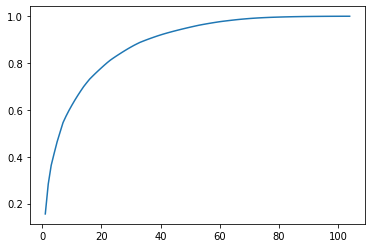

In [252]:
plt.plot(range(1, len(var_cum)+1), var_cum);

60 components are explaining 90% of the variance. So let's choose 60 components for the modeling

We will use IncrementalPCA to build the final PCA with 60 components.

In [253]:
pca_final = IncrementalPCA(n_components=55)

In [254]:
# Transforming the train set
X_pca_train = pca_final.fit_transform(X_train)

In [255]:
X_pca_train.shape

(44168, 55)

In [256]:
# Creating correlation coefficient matrix
corrmat = np.corrcoef(X_pca_train.transpose())

In [257]:
corrmat.shape

(55, 55)

Plotting the heatmap of the correlation matrix

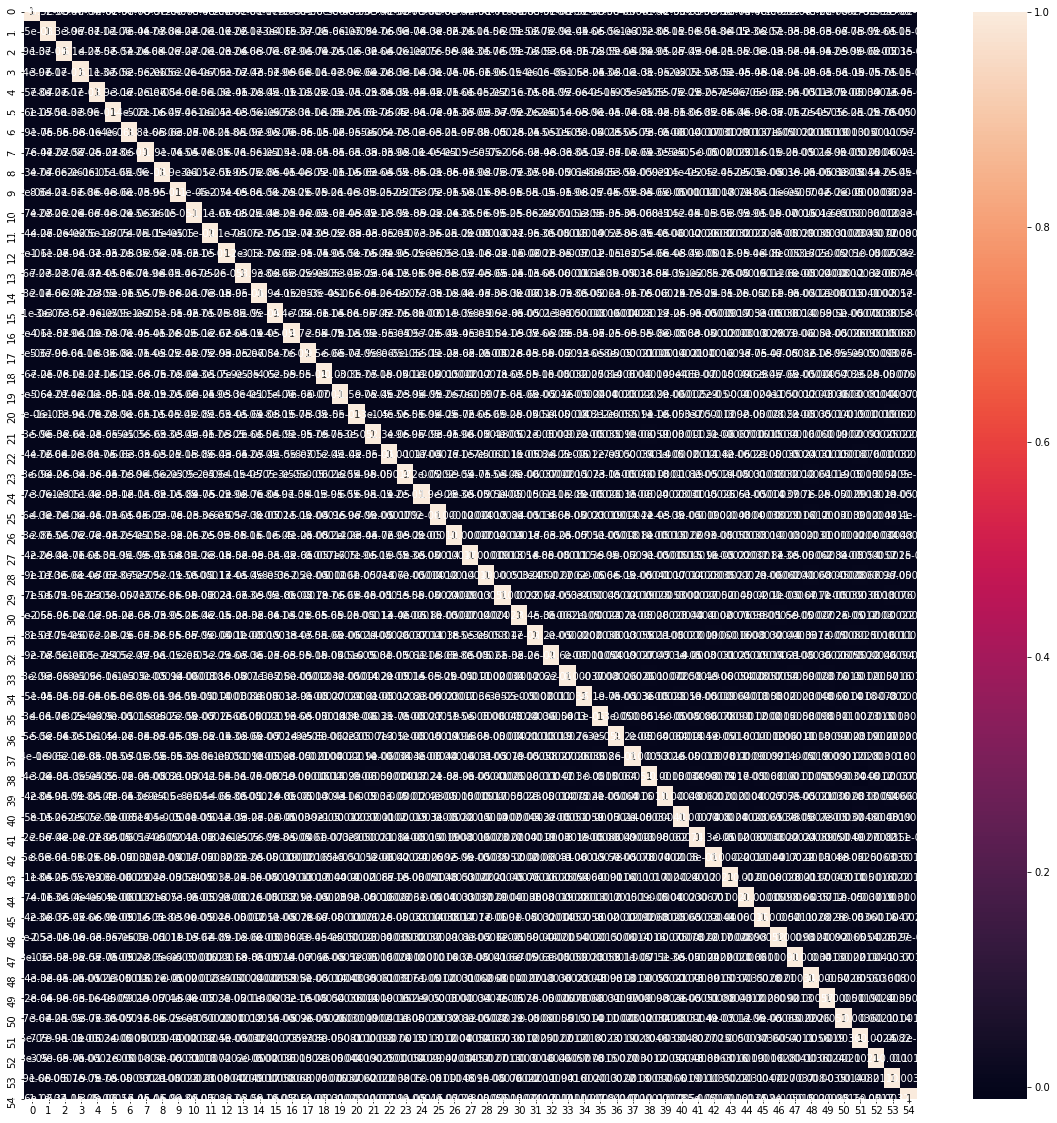

In [258]:
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True);

So we can see that multicoleanirity is taken care of by the PCA. So we can now fit the train set to obtain the train set.

In [259]:
# Transforming test data set.
X_pca_test = pca_final.transform(X_test)
X_pca_test.shape

(6001, 55)

### Applying Logistic Regression on PCA

In [260]:
# Instanciating the LogisticRegression 
learner_pca = LogisticRegression(random_state=42)

In [261]:
# building model with pca_train data
model_pca = learner_pca.fit(X_pca_train, y_train)

#### Making prediction on train set

In [262]:
y_train_pred = model_pca.predict(X_pca_train)

In [263]:
# Creating function to display Accuray, Sensitivity/ Recall and Confusion Matrix

def display_scores(y_test, y_pred):
    '''
    Display Accuray score, Sensitivity/ Recall score and Confusion Matrix of a model.
    '''
    confusion = confusion_matrix(y_test, y_pred)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    
    print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred)*100,2)}%")
    print(f"Sensitivity/Recall Score: {round(recall_score(y_test, y_pred)*100,2)}%") 
    print(f"Specificity score: {round((TN / float(TN+FP))*100,2)}%") 
    print(f"Precision Score: {round(precision_score(y_test, y_pred)*100,2)}%")    
    print(f"Confusion Matrix: \n {confusion}") 
  

In [264]:
# Printing train scores
display_scores(y_train, y_train_pred)

Accuracy Score: 84.29%
Sensitivity/Recall Score: 86.41%
Specificity score: 82.17%
Precision Score: 82.9%
Confusion Matrix: 
 [[18147  3937]
 [ 3002 19082]]


In [265]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [266]:
y_pred_prob = model_pca.predict_proba(X_pca_train)[:, 1]

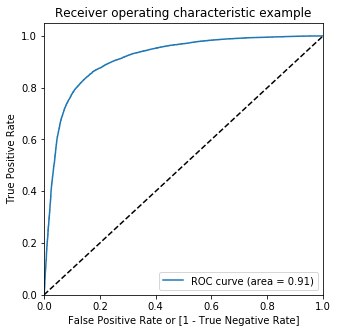

In [267]:
draw_roc(y_train, y_pred_prob)

#### Making prediction on the test set

In [268]:
pred_probs_test = model_pca.predict_proba(X_pca_test)

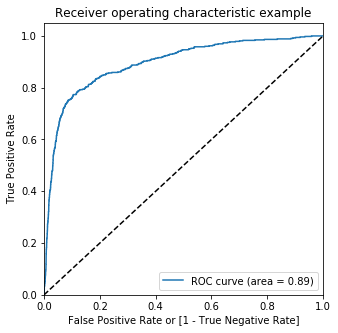

In [269]:
# Calling the function
draw_roc(y_test, pred_probs_test[:,1])

We can see that 83% area is under the curve so model is not bad.

In [270]:
# Prediction on pca_test data
y_pred = model_pca.predict(X_pca_test)
y_pred[:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [271]:
# Printing scores
display_scores(y_test, y_pred)

Accuracy Score: 82.72%
Sensitivity/Recall Score: 81.9%
Specificity score: 82.8%
Precision Score: 31.34%
Confusion Matrix: 
 [[4534  942]
 [  95  430]]


So the model can identify 64% of the churn among the actual churn accurately

### Hyperparameter tuning for Logistic Regression on PCA

In [272]:
# class imbalance
y_train.value_counts()/y_train.shape

1    0.5
0    0.5
Name: churn, dtype: float64

In [273]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

In [274]:
# Fit grid search
model = model_cv.fit(X_pca_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.6s finished


In [275]:
# cross validation results
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.437946,0.009926,0.009373,0.007653,0.01,{'C': 0.01},0.863438,0.860858,0.869184,0.862085,0.859092,0.862931,0.003438,6,0.864218,0.865537,0.861355,0.863994,0.863680,0.863757,0.001357
1,0.485757,0.028234,0.009374,0.007654,0.1,{'C': 0.1},0.863897,0.860858,0.870083,0.861632,0.858197,0.862934,0.004012,5,0.864444,0.865650,0.862206,0.864277,0.864134,0.864142,0.001107
2,0.474969,0.012499,0.009374,0.007654,1,{'C': 1},0.864127,0.861086,0.870308,0.862085,0.858197,0.863160,0.004053,1,0.864557,0.865593,0.862092,0.864277,0.864248,0.864154,0.001141
3,0.468718,0.013975,0.009374,0.007654,10,{'C': 10},0.864127,0.861086,0.870308,0.862085,0.858197,0.863160,0.004053,1,0.864557,0.865593,0.861979,0.864277,0.864248,0.864131,0.001182
4,0.474969,0.021194,0.012499,0.006249,100,{'C': 100},0.864127,0.861086,0.870308,0.862085,0.858197,0.863160,0.004053,1,0.864557,0.865593,0.861979,0.864277,0.864248,0.864131,0.001182
5,0.418722,0.081125,0.003125,0.006250,1000,{'C': 1000},0.864127,0.861086,0.870308,0.862085,0.858197,0.863160,0.004053,1,0.864557,0.865593,0.861979,0.864277,0.864248,0.864131,0.001182


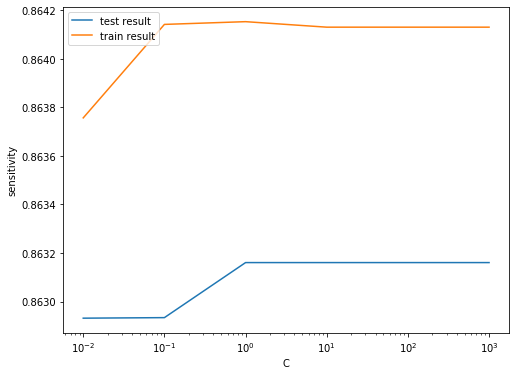

In [276]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [277]:
# View best hyperparameters
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print('Best Sensitivity:', best_score)
print('Best Penalty:', model_cv.best_estimator_.get_params()['penalty'])
print('Best C:', best_C)

Best Sensitivity: 0.8631604445530702
Best Penalty: l2
Best C: 1


#### Logistic regression with optimal C

In [278]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [279]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_pca_train, y_train)

#### Prediction on the train set

In [280]:
# predict churn on test data
y_train_pred = log_pca_model.predict(X_pca_train)

In [281]:
display_scores(y_train, y_train_pred)

Accuracy Score: 84.29%
Sensitivity/Recall Score: 86.41%
Specificity score: 82.17%
Precision Score: 82.9%
Confusion Matrix: 
 [[18147  3937]
 [ 3002 19082]]


#### Prediction on test set

In [282]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_pca_test)

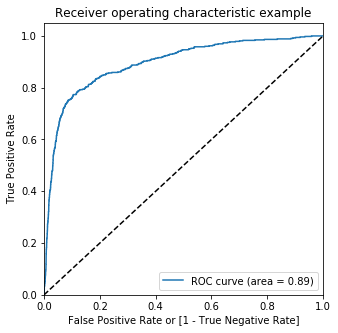

In [283]:
y_pred_prob = log_pca_model.predict_proba(X_pca_test)[:, 1]
draw_roc(y_test, y_pred_prob)

Area under the curve is same. its 85%.

In [284]:
display_scores(y_test, y_pred)

Accuracy Score: 82.72%
Sensitivity/Recall Score: 81.9%
Specificity score: 82.8%
Precision Score: 31.34%
Confusion Matrix: 
 [[4534  942]
 [  95  430]]


So the model can identify 70% of the churn among the actual churn accurately

## Applying Random Forest Classifier on PCA

In [121]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
model = GridSearchCV(estimator = rf, 
                     param_grid = param_grid,
                     cv = 3,
                     n_jobs = -1,
                     verbose = 1,
                     scoring="recall",
                     return_train_score=True)

In [122]:
# fit model
model.fit(X_pca_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 22.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='recall', verbose=1)

In [123]:
# cv results
cv_results = pd.DataFrame(model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,21.320381,0.043957,0.226861,0.017061,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.810080,0.814860,0.807907,0.810949,0.002904,1,0.824492,0.817688,0.813082,0.818421,0.004687
1,43.950625,0.502141,0.441090,0.033579,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.804510,0.814181,0.810216,0.809636,0.003969,3,0.819534,0.815718,0.816749,0.817334,0.001612
2,67.253791,1.756789,0.659747,0.073361,5,10,50,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.806820,0.812551,0.808722,0.809364,0.002383,4,0.820485,0.811439,0.814576,0.815500,0.003750
3,23.461131,1.995320,0.305413,0.090779,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.804239,0.815132,0.806005,0.808458,0.004774,5,0.819806,0.815514,0.813217,0.816179,0.002730
4,45.787062,0.061698,0.504502,0.074240,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.804918,0.811736,0.808314,0.808323,0.002783,6,0.819330,0.812525,0.815391,0.815749,0.002790
5,66.933099,0.924105,0.667345,0.057678,5,10,50,100,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.806140,0.814453,0.809401,0.809998,0.003420,2,0.817157,0.811914,0.815595,0.814889,0.002198
6,21.878428,0.934265,0.240615,0.008843,5,10,100,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.801250,0.807525,0.808586,0.805787,0.003237,10,0.814304,0.809673,0.814780,0.812919,0.002304
7,42.869268,1.221915,0.471419,0.033491,5,10,100,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.804103,0.811464,0.803831,0.806466,0.003536,8,0.817021,0.810488,0.809889,0.812466,0.003230
8,66.906491,1.188056,0.669699,0.058641,5,10,100,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.801929,0.810242,0.804103,0.805425,0.003520,12,0.815187,0.811982,0.809889,0.812353,0.002179
9,21.756474,1.701601,0.228431,0.015264,5,10,100,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.804374,0.803858,0.807635,0.805289,0.001672,13,0.816070,0.808042,0.814440,0.812851,0.003465


In [124]:
# print best hyperparameters
print("Best Sensitivity: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best Sensitivity:  0.8109489263192335
Best hyperparameters:  {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


#### Model with optimal hyperparameters

In [125]:
# model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [126]:
# Fit the model
rfc_model.fit(X_pca_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

#### Prediction on train set

In [127]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_pca_train)

In [129]:
display_scores(y_train, y_train_pred)

Accuracy Score: 83.18%
Sensitivity/Recall Score: 81.95%
Specificity score: 84.42%
Precision Score: 84.03%
Confusion Matrix: 
 [[18644  3440]
 [ 3987 18097]]


#### Prediction on test set

In [130]:
# check area under curve
y_pred_prob = model.predict_proba(X_pca_test)[:, 1]

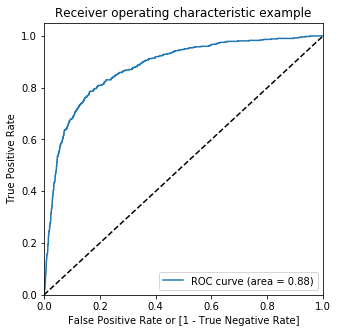

In [131]:
draw_roc(y_test, y_pred_prob)

AUC is bad only 56%

In [132]:
# predict churn on test data
y_pred = model.predict(X_pca_test)

In [133]:
display_scores(y_test, y_pred)

Accuracy Score: 84.24%
Sensitivity/Recall Score: 76.38%
Specificity score: 84.99%
Precision Score: 32.79%
Confusion Matrix: 
 [[4654  822]
 [ 124  401]]


Logistic Regression has the better ACU score than Random Forest.

## Applying Decision Tree Classifier on PCA

In [136]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_pca_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [137]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.266736,0.087632,0.002399,0.002938,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.802128,0.830881,0.817523,0.823822,0.800543,0.814980,0.011925,5
1,1.251678,0.116974,0.007649,0.006995,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.802128,0.830881,0.817523,0.823822,0.800543,0.814980,0.011925,5
2,1.171790,0.000013,0.006250,0.007655,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.800091,0.823862,0.817297,0.822464,0.791261,0.810995,0.013001,7
3,1.245427,0.059197,0.001199,0.002399,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.800091,0.823862,0.817297,0.822464,0.791261,0.810995,0.013001,7
4,2.011567,0.055721,0.000000,0.000000,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.836088,0.850351,0.855105,0.860734,0.866878,0.853831,0.010454,1
5,2.005421,0.084518,0.009375,0.007655,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.835861,0.849672,0.855105,0.860734,0.866878,0.853650,0.010579,2
6,1.922709,0.040626,0.007450,0.007026,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.830428,0.828390,0.827711,0.849411,0.845370,0.836262,0.009219,3
7,1.971456,0.073553,0.007850,0.006988,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.830428,0.828390,0.827711,0.849411,0.845370,0.836262,0.009219,3


In [138]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8538311403077044
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameter

In [140]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_pca_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Prediction on train set

In [141]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_pca_train)

In [143]:
display_scores(y_train, y_train_pred)

Accuracy Score: 86.14%
Sensitivity/Recall Score: 87.81%
Specificity score: 84.46%
Precision Score: 84.96%
Confusion Matrix: 
 [[18652  3432]
 [ 2691 19393]]


#### Prediction on test set

In [146]:
y_pred = dt_pca_model.predict(X_pca_test)

In [147]:
display_scores(y_test, y_pred)

Accuracy Score: 81.74%
Sensitivity/Recall Score: 72.57%
Specificity score: 82.62%
Precision Score: 28.58%
Confusion Matrix: 
 [[4524  952]
 [ 144  381]]
